# Machine Learning IDATT2502 - Regression Exercises

These exercises will apply regression logic on a dataset containing observations on newborn babies.

## Linear Regression in 2 Dimensions

In this first exercise, I will be creating a linear model that predicts the weight based on length. Observations come from the length_weight.csv.

For a linear regression in 2 dimensions, the linear predictor function is utilized: `f(x) = xW + b`
where x is the input observation and W and b are model parameters.

The first thing to do in order to properly test the accuracy of the model is to split the data set. I will be splitting the data set into 80% training and 20% testing.


In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import read_csv

# Read file as dataframe
df = read_csv("length_weight.csv")

# Split dataframe into 80% training and 20% test.
train_2D_set, test_2D_set = train_test_split(df, test_size=0.2)

print(train_2D_set)
# Independent variable is length
length_2D_train = torch.tensor(train_2D_set['# length'].values, dtype=torch.float64).reshape(-1, 1)
length_2D_test = torch.tensor(test_2D_set['# length'].values, dtype=torch.float64).reshape(-1, 1)

# Dependent variable is weight 
weight_2D_train = torch.tensor(train_2D_set['weight'].values, dtype=torch.float64).reshape(-1, 1)
weight_2D_test = torch.tensor(test_2D_set['weight'].values, dtype=torch.float64).reshape(-1, 1)

print(train_2D_set)
print(test_2D_set)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
     # length     weight
642     108.9  17.404199
853      96.4  16.386717
951      49.4   3.589478
130      71.5   8.377974
460      48.3   2.973130
..        ...        ...
476      75.7   8.470920
983      78.7  10.767503
164     100.8  16.215864
659      90.6  10.709359
733      58.3   5.612888

[800 rows x 2 columns]
     # length     weight
642     108.9  17.404199
853      96.4  16.386717
951      49.4   3.589478
130      71.5   8.377974
460      48.3   2.973130
..        ...        ...
4

Next, the object for the model needs to be created. The model object will have a predictor method (the linear predictor function) and a loss fuction (MSE).

In [2]:
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
        self.b = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
    
    # Predictor
    def f(self, x):
        return x @ self.W + self.b
    
    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))
    
model = LinearRegressionModel()

The model parameters need to be optimized and this can be done through minimizing the loss. Specifically in this exercise, I will be using PyTorch's Stochastic Gradient Descent (SGD); however, for linear regressions, derivation of the function and finding the minimum (f'(x) = 0) would result in the global minimum.

In [3]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([model.W, model.b], 0.00001)

# Run 10000 optimization iterations.
for epoch in range(100000):
    model.loss(length_2D_train, weight_2D_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(length_2D_train, weight_2D_train)))

W = tensor([[0.1468]], dtype=torch.float64, requires_grad=True), b = tensor([[-0.8818]], dtype=torch.float64, requires_grad=True), loss = tensor(4.2031, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Visualization of model

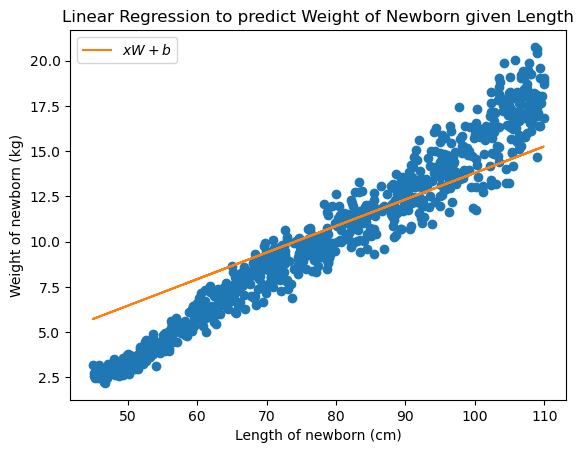

In [4]:
plt.plot(length_2D_train, weight_2D_train, 'o')

# Line plot of model
plt.plot(length_2D_train.detach().numpy(), model.f(length_2D_train).detach().numpy(), label="$xW + b$")  

plt.xlabel('Length of newborn (cm)')
plt.ylabel('Weight of newborn (kg)')
plt.title('Linear Regression to predict Weight of Newborn given Length')
plt.legend()
plt.show()

### Testing accuracy of Model

Using the test data separated at the start, a final evaluation of the accuracy of the model could be determined. Here, the MAE, MSE, R-Squared, and RMSE can be calculated. Ultimately, the MAE of the model can be seen through the loss function.

## Linear Regression in 3 Dimensions

In this exercise, I will be creating a linear model that predicts the age (in days) out from the length and weight of the given observations in day_length_weight.csv.

Again, the first thing to do is get the datasets ready to be worked on. This is done by separating the dataset into training and testing, as well as separating the independent and dependent variables.

In [25]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import read_csv

# Read file as dataframe
df = read_csv("day_length_weight.csv")

# Split dataframe into 80% training and 20% test.
train_set, test_set = train_test_split(df, test_size=0.2)

# Independent variables are length and weight
length_train = torch.tensor(train_set['length'].values, dtype=torch.float64).reshape(-1, 1)
length_test = torch.tensor(test_set['length'].values, dtype=torch.float64).reshape(-1, 1)

weight_train = torch.tensor(train_set['weight'].values, dtype=torch.float64).reshape(-1, 1)
weight_test = torch.tensor(test_set['weight'].values, dtype=torch.float64).reshape(-1, 1)

indep_train = torch.cat((length_train, weight_train), dim=1)
indep_test = torch.cat((length_test, weight_test), dim=1)


# Dependent variable is age in days 
age_train = torch.tensor(train_set['# day'].values, dtype=torch.float64).reshape(-1, 1)
age_test = torch.tensor(test_set['# day'].values, dtype=torch.float64).reshape(-1, 1)

print(indep_train)

print(train_set)
print(test_set)

tensor([[114.5323,  15.7347],
        [ 76.3862,  11.1359],
        [ 76.9401,   9.5342],
        ...,
        [115.0396,  13.1421],
        [ 70.8455,   7.9560],
        [102.8390,  19.7984]], dtype=torch.float64)
      # day      length     weight
393  1830.0  114.532324  15.734742
468   471.0   76.386183  11.135898
131   366.0   76.940106   9.534162
240  1743.0  110.085345  20.856916
982  1374.0   98.664985  13.702916
..      ...         ...        ...
1     964.0   92.822120  14.719081
983   361.0   76.113615   6.370103
200  1691.0  115.039559  13.142077
857   239.0   70.845486   7.956003
450  1593.0  102.838955  19.798412

[800 rows x 3 columns]
      # day      length     weight
614   946.0   91.697931  13.682885
134   207.0   67.910563   7.558824
778  1194.0  101.121244  14.082893
349  1397.0  106.113836  16.520430
289  1530.0  106.893434  16.058969
..      ...         ...        ...
376   556.0   84.150834  10.047461
645  1286.0   93.940234  15.750563
547  1776.0  104.959835  2

The linear model for a problem with an extra explanatory variable is a little different.

In [26]:
class Linear3DRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], dtype=torch.float64, requires_grad=True)
        self.b = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
    
    # Predictor
    def f(self, x):
        return x @ self.W + self.b
    
    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))

model = Linear3DRegressionModel()

In [27]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([model.W, model.b], 0.00001)

# Run 10000 optimization iterations.
for epoch in range(10000):
    model.loss(indep_train, age_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(indep_train, age_train)))

W = tensor([[ 1.0595],
        [67.8510]], dtype=torch.float64, requires_grad=True), b = tensor([[-9.9030]], dtype=torch.float64, requires_grad=True), loss = tensor(97793.8078, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Visualization of Model

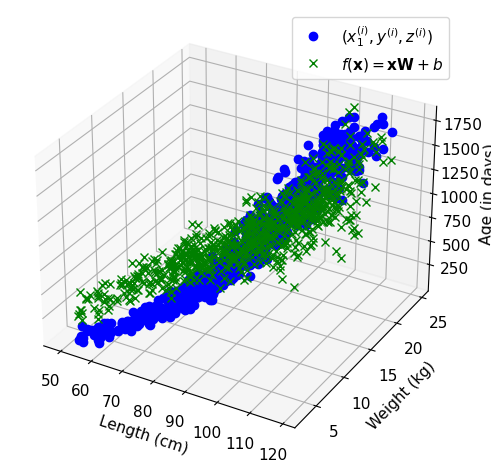

In [29]:
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, art3d
import numpy as np

matplotlib.rcParams.update({'font.size': 11})


fig = plt.figure('3D Linear Regression of Age of a Newborn based on Length and Weight')

ax = fig.add_subplot(111, projection='3d')  # 3D plots require a subplot with 3D projection enabled


ax.plot(length_train[:].squeeze(), weight_train[:].squeeze(), age_train[:].squeeze(), 'o', label='$(x_1^{(i)},y^{(i)},z^{(i)})$', color='blue')

# Plot the original points 
#ax.plot(x_train.detach().numpy(), y_train.detach().numpy(), z_train.detach().numpy(), 'o')

# Plot the model
plot1_f = ax.plot(np.array(length_train, dtype=object), np.array(weight_train, dtype=object), np.array(model.f(indep_train).detach().numpy(), dtype=object), 'x', color='green', label='$f(\\mathbf{x}) = \\mathbf{xW}+b$')
plot1_info = fig.text(0.01, 0.03, '')


ax.set_xlabel('Length (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Age (in days)')
plt.legend()
fig.tight_layout()
plt.show()

## Non-Linear Regression in 2 Dimensions

In this exercise, I will create a non-linear model that predicts the circumference of the head based on the age in days from the day_head_circumference.csv observations.


In [20]:
# Read file as dataframe
df = read_csv("day_head_circumference.csv")

# Split dataframe into 80% training and 20% test.
train_set, test_set = train_test_split(df, test_size=0.2)

# Independent variable is length
x_train = torch.tensor(train_set['# day'].values, dtype=torch.float64).reshape(-1, 1)
x_test = torch.tensor(test_set['# day'].values, dtype=torch.float64).reshape(-1, 1)

# Dependent variable is weight 
y_train = torch.tensor(train_set['head circumference'].values, dtype=torch.float64).reshape(-1, 1)
y_test = torch.tensor(test_set['head circumference'].values, dtype=torch.float64).reshape(-1, 1)

print(train_set)
print(test_set)

      # day  head circumference
633  1262.0           51.425129
171  1068.0           46.636807
506  1549.0           51.068228
944   295.0           45.809252
464   693.0           47.510180
..      ...                 ...
777  1054.0           50.156215
41    100.0           41.035306
131  1272.0           50.079943
615    79.0           41.555915
534   796.0           49.248870

[800 rows x 2 columns]
      # day  head circumference
386   742.0           50.122434
10    680.0           48.581376
554  1537.0           50.889847
652  1670.0           52.144608
14    130.0           41.772081
..      ...                 ...
814  1212.0           50.056700
549   446.0           45.373001
927    15.0           36.530335
339   758.0           47.627647
106   214.0           43.385210

[200 rows x 2 columns]


Since the model is non-linear, the class needs to include a different predictor function.

In [21]:
class NonLinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
        self.b = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
    
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    # Predictor
    def f(self, x):
        return 20 * self.sigmoid(x @ self.W + self.b) + 31
   
    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))
    
model = NonLinearRegressionModel()

In [22]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([model.W, model.b], 0.000001)

# Run 10000 optimization iterations.
for epoch in range(10000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.0034]], dtype=torch.float64, requires_grad=True), b = tensor([[-0.0135]], dtype=torch.float64, requires_grad=True), loss = tensor(3.0206, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Visualization of the model

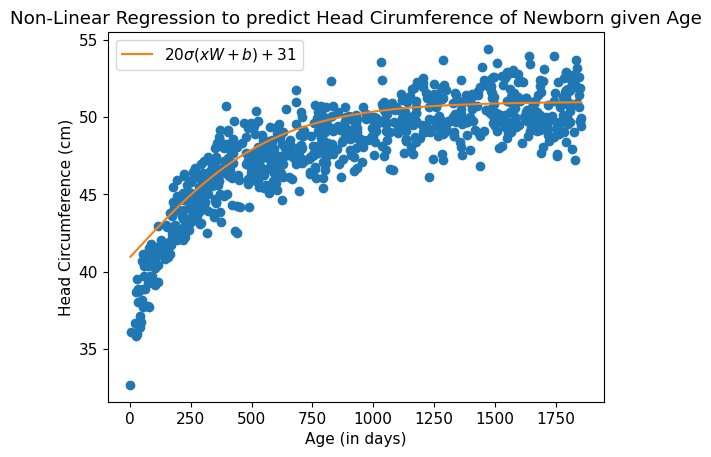

In [23]:
plt.plot(x_train, y_train, 'o')

# Line plot of model
x = torch.arange(torch.min(x_train), torch.max(x_train), 1.0, dtype=torch.float64).reshape(-1, 1)
plt.plot(x, model.f(x).detach().numpy(), label="$20σ(xW + b) + 31$")

plt.xlabel('Age (in days)')
plt.ylabel('Head Circumference (cm)')
plt.title('Non-Linear Regression to predict Head Cirumference of Newborn given Age')
plt.legend()
plt.show()